In [35]:
import requests as req
import pandas as pd
census_api='c7eba3a0d60bd1b182e282f08d0ccfd80a29c73a'
from census import Census

In [58]:
# read places 
xls = pd.ExcelFile('Project1_AmazonSites.xlsx') 
places_df=xls.parse('AmazonCities', dtype=str) 

In [37]:
places = places_df[['PlaceCode','StateCode']]
places


,PlaceCode,StateCode
0,50000,11
1,51000,36
2,07000,25
3,14000,17
4,44000,06
5,55000,37
6,05000,48
7,04000,13


In [64]:
codes_df = xls.parse('CensusFields',parse_cols=1)

In [38]:
c = Census(census_api, year=2016)
home_rent =[]

In [39]:
for p in places.values:
    place_state = {'for':'place:'+ str(p[0]),'in':'state:'+str(p[1])}
    codes_census = 
    census_data = c.acs5.get(("NAME", "B25077_001E", "B25064_001E", "B01003_001E",
                          "B19013_001E"), place_state)
    print(census_data)
    home_rent.append({'City':census_data[0]['NAME'],
                     'Median home value':census_data[0]['B25077_001E'],
                     'Median gross rent':census_data[0]['B25064_001E'],
                     'Population':census_data[0]['B01003_001E'],
                     'Income':census_data[0]['B19013_001E']})
print(home_rent)    
    

[{'NAME': 'Washington city, District of Columbia', 'B25077_001E': 506100.0, 'B25064_001E': 1362.0, 'B01003_001E': 659009.0, 'B19013_001E': 72935.0, 'state': '11', 'place': '50000'}]
[{'NAME': 'New York city, New York', 'B25077_001E': 508900.0, 'B25064_001E': 1294.0, 'B01003_001E': 8461961.0, 'B19013_001E': 55191.0, 'state': '36', 'place': '51000'}]
[{'NAME': 'Boston city, Massachusetts', 'B25077_001E': 423200.0, 'B25064_001E': 1369.0, 'B01003_001E': 658279.0, 'B19013_001E': 58516.0, 'state': '25', 'place': '07000'}]
[{'NAME': 'Chicago city, Illinois', 'B25077_001E': 225200.0, 'B25064_001E': 987.0, 'B01003_001E': 2714017.0, 'B19013_001E': 50434.0, 'state': '17', 'place': '14000'}]
[{'NAME': 'Los Angeles city, California', 'B25077_001E': 496300.0, 'B25064_001E': 1241.0, 'B01003_001E': 3918872.0, 'B19013_001E': 51538.0, 'state': '06', 'place': '44000'}]
[{'NAME': 'Raleigh city, North Carolina', 'B25077_001E': 218200.0, 'B25064_001E': 966.0, 'B01003_001E': 441326.0, 'B19013_001E': 58641.0,

In [41]:
#get dataframe
housing_df = pd.DataFrame(home_rent)
housing_df

,City,Income,Median gross rent,Median home value,Population
0,"Washington city, District of Columbia",72935.0,1362.0,506100.0,659009.0
1,"New York city, New York",55191.0,1294.0,508900.0,8461961.0
2,"Boston city, Massachusetts",58516.0,1369.0,423200.0,658279.0
3,"Chicago city, Illinois",50434.0,987.0,225200.0,2714017.0
4,"Los Angeles city, California",51538.0,1241.0,496300.0,3918872.0
5,"Raleigh city, North Carolina",58641.0,966.0,218200.0,441326.0
6,"Austin city, Texas",60939.0,1106.0,257800.0,907779.0
7,"Atlanta city, Georgia",49398.0,998.0,222300.0,456378.0


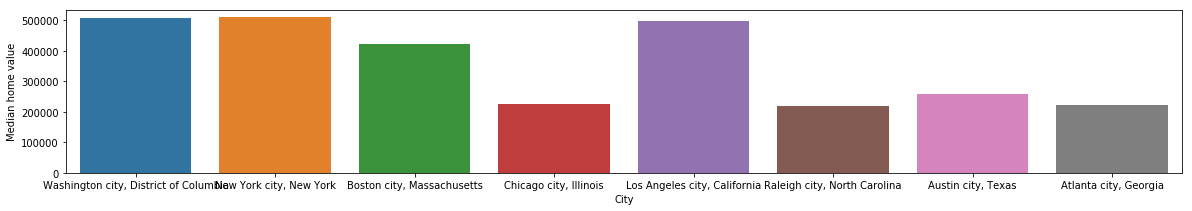

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
sns.barplot(x='City',y='Median home value',data=housing_df)
plt.show()

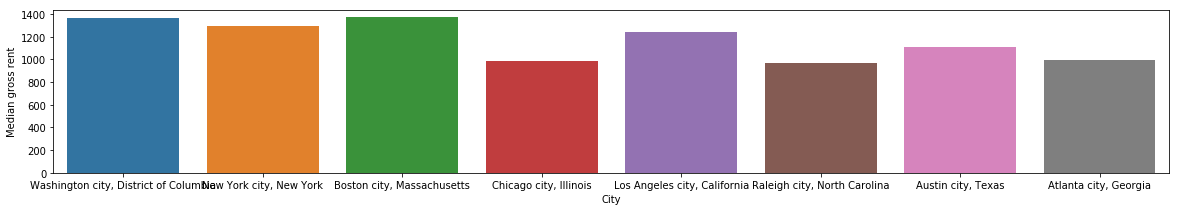

In [98]:
plt.figure(figsize=(20,3))

sns.barplot(x='City',y='Median gross rent',data=housing_df)
plt.show()

In [117]:
cost = housing_df[['City',"Median home value", "Median gross rent"]]
sns.set(style="ticks")
sns.pairplot(cost,hue="City")

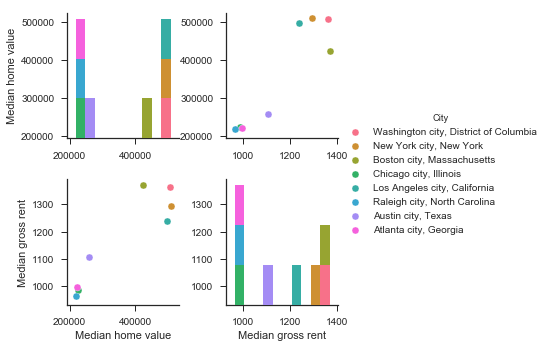

In [118]:
plt.show()

In [127]:
sns.set(style="whitegrid")

# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(cost, y_vars="City",
                 x_vars=["Median gross rent", "Median home value"],
                 size=9, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.barplot, color=sns.xkcd_rgb["green"])
#g.set(ylim=(0, 1))
#sns.despine(fig=g.fig, left=True)

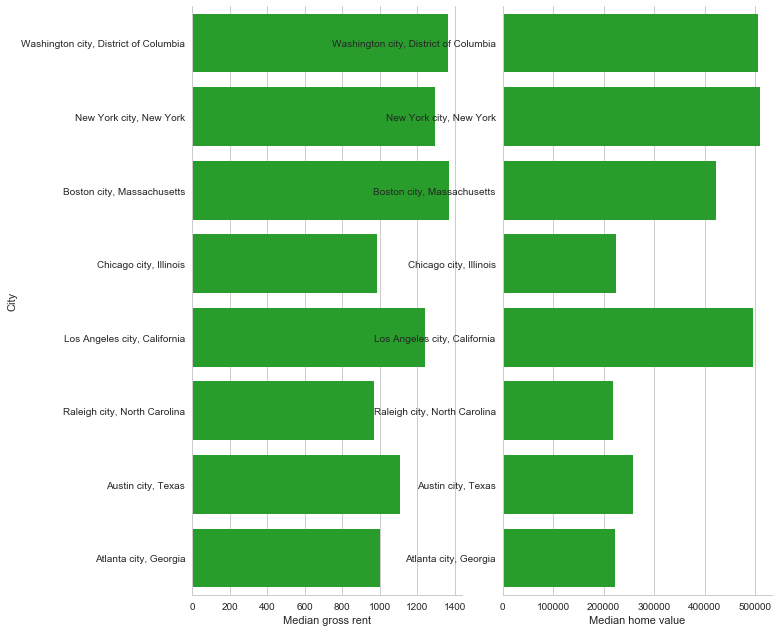

In [128]:
plt.show()